In [ ]:
from tensorflow.python.keras.callbacks import History
import tensorflow
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras import layers
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img, save_img, img_to_array
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import History
from PIL import Image
from skimage.color import gray2rgb

# **Loading Sign language recognition data**

In [ ]:
X=np.load('/content/drive/MyDrive/sign/X.npy')
Y=np.load('/content/drive/MyDrive/sign/Y.npy')
print(X.shape, Y.shape)

(2062, 64, 64) (2062, 10)


# **Splitting dataset**

In [ ]:
x_train, x_rem, y_train, y_rem = train_test_split(X,Y, train_size=0.8)
x_valid, x_test, y_valid, y_test=train_test_split(x_rem,y_rem, test_size=0.5)
x_train = np.repeat(x_train[..., np.newaxis], 3, -1)
x_test= np.repeat(x_test[..., np.newaxis], 3, -1)
x_valid= np.repeat(x_valid[..., np.newaxis], 3, -1)

print(x_train.shape,y_train.shape,x_test.shape,y_test.shape,x_valid.shape,y_valid.shape)


(1649, 64, 64, 3) (1649, 10) (207, 64, 64, 3) (207, 10) (206, 64, 64, 3) (206, 10)


# **Using Pretrained Model VGG16 (transfer learning)**

In [ ]:
conv_base=VGG16(include_top=False, weights='imagenet',input_shape=(64,64,3))
conv_base.trainable=False

58900480/58889256 [==============================] - 0s 0us/step


# **Model Architecture**

In [ ]:
network=models.Sequential()
network.add(conv_base)
network.add(layers.Flatten())
network.add(layers.Dense(1024, activation='relu'))
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

# **Model Training**

In [ ]:
history=network.fit(x_train,y_train, validation_data=[x_valid, y_valid], epochs=10, batch_size=20)

Epoch 1/10
83/83 [==============================] - 93s 1s/step - loss: 1.4838 - accuracy: 0.5003 - val_loss: 0.9789 - val_accuracy: 0.6262
Epoch 2/10
83/83 [==============================] - 95s 1s/step - loss: 0.6925 - accuracy: 0.7538 - val_loss: 0.5041 - val_accuracy: 0.8107
Epoch 3/10
83/83 [==============================] - 81s 980ms/step - loss: 0.5123 - accuracy: 0.8108 - val_loss: 0.6388 - val_accuracy: 0.7379
Epoch 4/10
83/83 [==============================] - 79s 950ms/step - loss: 0.3910 - accuracy: 0.8496 - val_loss: 0.6074 - val_accuracy: 0.7524
Epoch 5/10
83/83 [==============================] - 80s 969ms/step - loss: 0.3409 - accuracy: 0.8781 - val_loss: 0.3624 - val_accuracy: 0.8786
Epoch 6/10
83/83 [==============================] - 79s 950ms/step - loss: 0.2664 - accuracy: 0.9036 - val_loss: 0.2677 - val_accuracy: 0.8981
Epoch 7/10
83/83 [==============================] - 79s 950ms/step - loss: 0.2646 - accuracy: 0.9078 - val_loss: 0.5408 - val_accuracy: 0.8447
Epoch

# **Model Prediction**

In [ ]:
loss, accuracy=network.evaluate(x_test,y_test)

7/7 [==============================] - 9s 1s/step - loss: 0.4365 - accuracy: 0.8696


In [ ]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dense_1 (Dense)             (None, 256)               262400    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 17,077,834
Trainable params: 2,363,146
Non-trainable params: 14,714,688
_________________________________________________________________


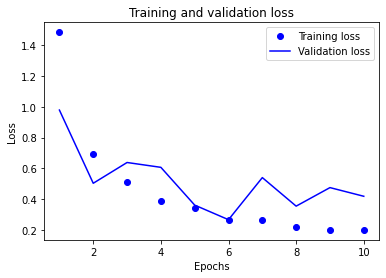

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('loss')
plt.show()

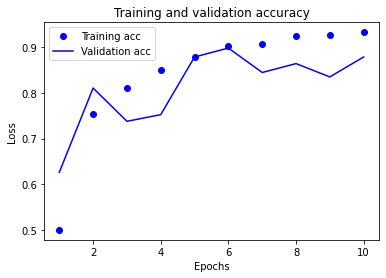

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('acc')
plt.show()